### Customer Insight

# Exploratory Data Analysis & Model Understanding

This notebook explores the dataset used for the Customer Sentiment Analysis project.

The goals are:
- Understand the structure and quality of the data
- Analyze label distribution and text characteristics
- Establish a baseline machine learning model
- Explain why transformer-based models perform better


In [1]:
from datasets import load_dataset
import pandas as pd
from pathlib import Path

In [2]:
RAW_DATA_DIR = Path("data/raw")
RAW_DATA_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
def download_amazon_reviews(sample_size: int = 5000) -> None:
  """
  Download a sample of Amazon Polarity reviews.
  saves raw data to data/raw/.
  """
  print("Dowloading dataset....")
  dataset = load_dataset("amazon_polarity", split=f"train[:{sample_size}]")

  df = pd.DataFrame({
      "text": dataset["content"],
      "label": dataset["label"]
  })

  output_path = RAW_DATA_DIR / "amazon_reviews.csv"
  df.to_csv(output_path, index=False)

  print(f"Saved raw data to {output_path}")


if __name__ == "__main__":
  download_amazon_reviews()

Dowloading dataset....


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

amazon_polarity/train-00000-of-00004.par(…):   0%|          | 0.00/260M [00:00<?, ?B/s]

amazon_polarity/train-00001-of-00004.par(…):   0%|          | 0.00/258M [00:00<?, ?B/s]

amazon_polarity/train-00002-of-00004.par(…):   0%|          | 0.00/255M [00:00<?, ?B/s]

amazon_polarity/train-00003-of-00004.par(…):   0%|          | 0.00/254M [00:00<?, ?B/s]

amazon_polarity/test-00000-of-00001.parq(…):   0%|          | 0.00/117M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3600000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400000 [00:00<?, ? examples/s]

Saved raw data to data/raw/amazon_reviews.csv


## 1. Dataset Overview

The dataset consists of customer product reviews labeled with sentiment.

Each row contains:
- `content`: preprocessed review text
- `label`: sentiment class (0 = negative, 1 = positive)

The dataset was cleaned prior to modeling to remove noise such as emails, excessive whitespace, and formatting issues.


In [5]:
# load data

df = pd.read_csv('data/raw/amazon_reviews.csv')
df.head()

,text,label
0,This sound track was beautiful! It paints the ...,1
1,I'm reading a lot of reviews saying that this ...,1
2,This soundtrack is my favorite music of all ti...,1
3,I truly like this soundtrack and I enjoy video...,1
4,"If you've played the game, you know how divine...",1


In [6]:
df.tail()

,text,label
4995,Last year I found this book and once I opened ...,1
4996,"Yes, all the reviews are correct: This is an e...",1
4997,I remember last year around Halloween I read a...,1
4998,I thought this book was magnificent. The way V...,1
4999,Vincent Bugliosi isn't kidding when he writes ...,1


In [7]:
df.columns

Index(['text', 'label'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [9]:
df.shape

(5000, 2)

In [10]:
df.isna().sum()

,0
text,0
label,0


In [11]:
df.describe()

,label
count,5000.000000
mean,0.461600
std,0.498573
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
df['label'].value_counts(normalize=True)

,proportion
label,
0,0.5384
1,0.4616


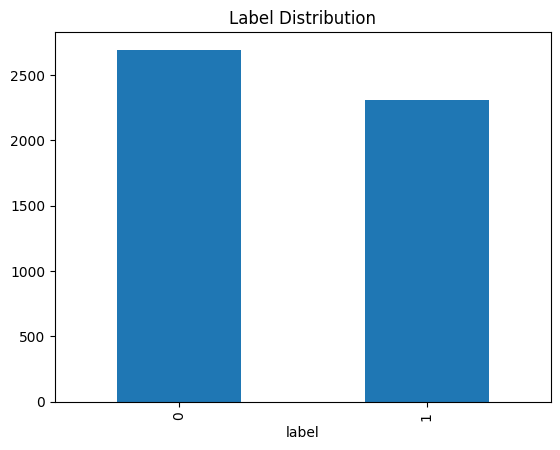

In [14]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind="bar")
plt.title("Label Distribution")
plt.show()

In [20]:
# Text length
df["text_length"] = df["text"].apply(lambda x: len(x.split()))

df["text_length"].describe()


,text_length
count,5000.000000
mean,74.594600
std,42.091379
min,10.000000
25%,40.000000
50%,66.000000
75%,103.000000
max,195.000000


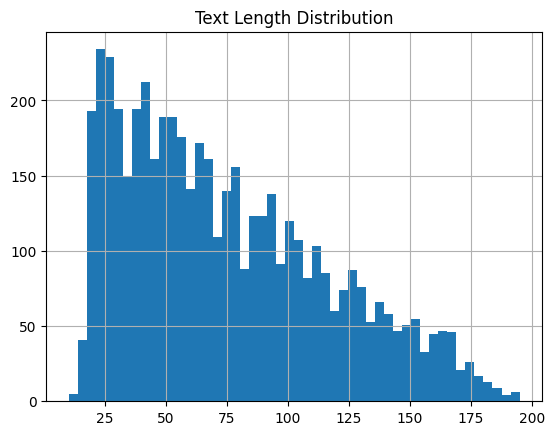

In [21]:
df["text_length"].hist(bins=50)
plt.title("Text Length Distribution")
plt.show()

### Baseline TF-IDF experiment

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X = df["text"]
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

vectorizer = TfidfVectorizer(max_features=20000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

preds = model.predict(X_test_vec)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       538
           1       0.83      0.74      0.78       462

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



## 5. Baseline Model

Before applying deep learning, a classical machine learning baseline was implemented.

Pipeline:
- TF-IDF vectorization
- Logistic Regression classifier

This baseline establishes a reference performance level for comparison.


TF-IDF treats text as independent words.
Transformers model relationships between words using attention, enabling better handling of negation, sentiment intensity, and context.

### Conclusion

Dataset is moderately clean and balanced

Baseline ML performs reasonably well

Transformer improves performance by capturing contextual semantics

Deployment requires separating experimentation from production code